# Some analyses to do on npz files

In [29]:
### This section of the code is specifically for the Jupyter notebook environment

%pylab inline

# Change matplotlib defaults
matplotlib.rcParams['savefig.dpi'] = 150
matplotlib.rcParams['figure.figsize'] = (4,3)
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['xtick.labelsize'] = 'small'
matplotlib.rcParams['ytick.labelsize'] = 'small'
#matplotlib.rcParams['legend.fancybox'] = 'True'
#matplotlib.rcParams['legend.fontsize'] = 'small'
matplotlib.rcParams['legend.numpoints'] = 1

plt.style.use('dark_background')

Populating the interactive namespace from numpy and matplotlib


## This code was provided by Roman

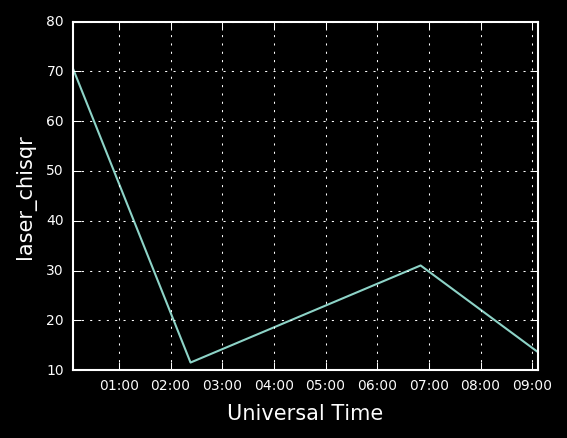

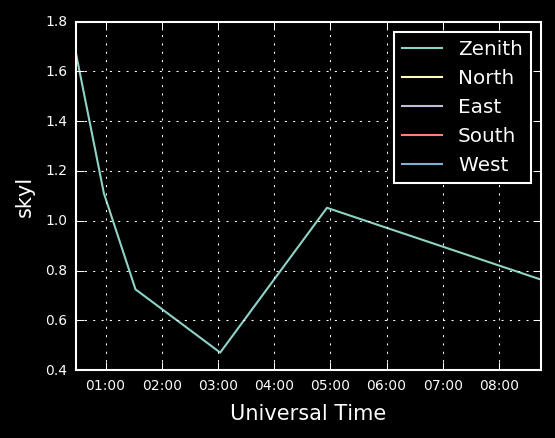

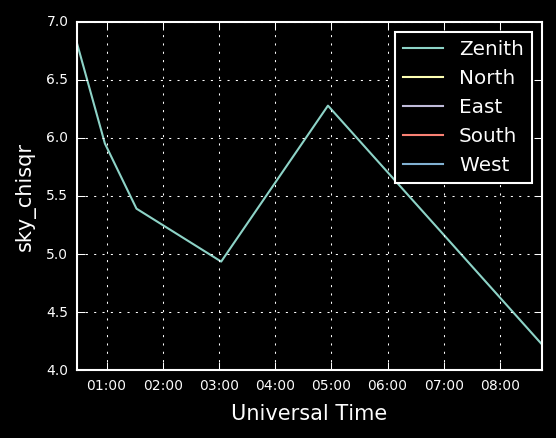

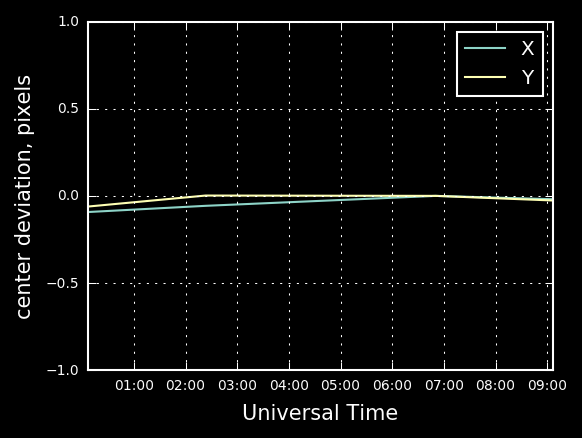

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

def all_indices(value, qlist):
# Function to return all of the indicies in a list that match a requested value
#
# INPUTS:
#       value - value to be matched
#       qlist - list to search through
#
# OUTPUTS:
#       indices - indecies in qlist that match value
#
# HISTORY:
#       10 Aug 2012 - written by Jonathan J. Makela (jmakela@illinois.edu) based on
#       http://stackoverflow.com/questions/176918/in-python-how-do-i-find-the-index-of-an-item-given-a-list-containing-it

    indices = []
    idx = -1
    while True:
        try:
            idx = qlist.index(value, idx+1)
            indices.append(idx)
        except ValueError:
            break
    return indices

#npzfile = np.load('G:\\FPI\\python\\FPI\\results\\arinae_tor_20160630.npz')
#npzfile = np.load('/rdata/airglow/fpi/results/minime05_uao_20160702.npz')
npzfile = np.load('/home/bhardin2/FPI_analysis_code_package/results/minime05_uao_20131001.npz')
#print(npzfile.keys())
FPI_Results = npzfile['FPI_Results']
FPI_Results = FPI_Results.reshape(-1)[0]
#print(FPI_Results.keys())
#print(FPI_Results['T'])

Fig = plt.figure()
Graph = Fig.add_subplot(111)
Graph.hold(True)
Graph.grid(True)
Graph.plot(FPI_Results['laser_times'], FPI_Results['laser_chisqr'])
Graph.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
Graph.set_xlabel('Universal Time', fontsize = 10)
Graph.set_ylabel('laser_chisqr', fontsize = 10)
#Fig.savefig('20160630_npz_laser_chisqr.png')

indz = all_indices('Zenith',FPI_Results['direction'])
indn = all_indices('North',FPI_Results['direction'])
inde = all_indices('East',FPI_Results['direction'])
inds = all_indices('South',FPI_Results['direction'])
indw = all_indices('West',FPI_Results['direction'])

FigD = plt.figure()
GraphD = FigD.add_subplot(111)
GraphD.hold(True)
GraphD.grid(True)

linez, = GraphD.plot(FPI_Results['sky_times'][indz], FPI_Results['skyI'][indz], label='Zenith')
linen, = GraphD.plot(FPI_Results['sky_times'][indn], FPI_Results['skyI'][indn], label='North')
linee, = GraphD.plot(FPI_Results['sky_times'][inde], FPI_Results['skyI'][inde], label='East')
lines, = GraphD.plot(FPI_Results['sky_times'][inds], FPI_Results['skyI'][inds], label='South')
linew, = GraphD.plot(FPI_Results['sky_times'][indw], FPI_Results['skyI'][indw], label='West')

GraphD.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
GraphD.set_xlabel('Universal Time', fontsize = 10)
GraphD.set_ylabel('skyI', fontsize = 10)
GraphD.legend(handler_map={})
#FigD.savefig('20160630_npz_skyI.png')

FigD1 = plt.figure()
GraphD1 = FigD1.add_subplot(111)
GraphD1.hold(True)
GraphD1.grid(True)

linez, = GraphD1.plot(FPI_Results['sky_times'][indz], FPI_Results['sky_chisqr'][indz], label='Zenith')
linen, = GraphD1.plot(FPI_Results['sky_times'][indn], FPI_Results['sky_chisqr'][indn], label='North')
linee, = GraphD1.plot(FPI_Results['sky_times'][inde], FPI_Results['sky_chisqr'][inde], label='East')
lines, = GraphD1.plot(FPI_Results['sky_times'][inds], FPI_Results['sky_chisqr'][inds], label='South')
linew, = GraphD1.plot(FPI_Results['sky_times'][indw], FPI_Results['sky_chisqr'][indw], label='West')

GraphD1.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
GraphD1.set_xlabel('Universal Time', fontsize = 10)
GraphD1.set_ylabel('sky_chisqr', fontsize = 10)
GraphD1.legend(handler_map={})
#FigD1.savefig('20160630_npz_sky_chisqr.png')

FigDC = plt.figure()
GraphDC = FigDC.add_subplot(111)
GraphDC.hold(True)
GraphDC.grid(True)

med = len(FPI_Results['center_pixel'][:,0])/2
#print(FPI_Results['center_pixel'])
#print(med)
xdev = FPI_Results['center_pixel'][:,0]-FPI_Results['center_pixel'][med,0]
ydev = FPI_Results['center_pixel'][:,1]-FPI_Results['center_pixel'][med,1]
linex, = GraphDC.plot(FPI_Results['laser_times'], xdev, label='X')
liney, = GraphDC.plot(FPI_Results['laser_times'], ydev, label='Y')

GraphDC.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
GraphDC.set_xlabel('Universal Time', fontsize = 10)
GraphDC.set_ylabel('center deviation, pixels', fontsize = 10)
GraphDC.set_ylim(-1,1)
GraphDC.legend(handler_map={})
#FigDC.savefig('20160630_npz_center_pixel.png')#

## This is some example code for how to look at more instrument parameters (which are estimated from the laser images). You can use this to reproduce the diagnostics figure.

['lam', 'B', 'I', 'n', 'a1', 'R', 'b0', 't', 'b2', 'alpha', 'a2', 'b1']


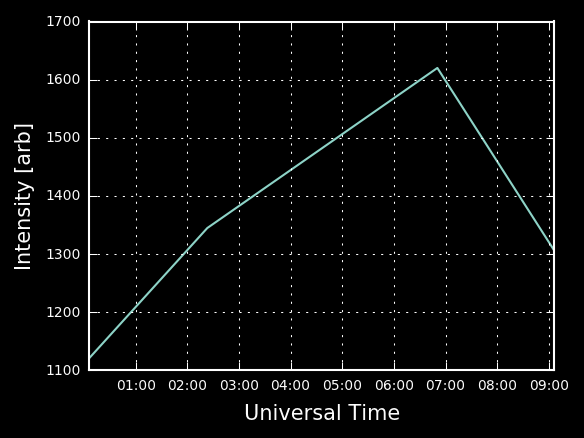

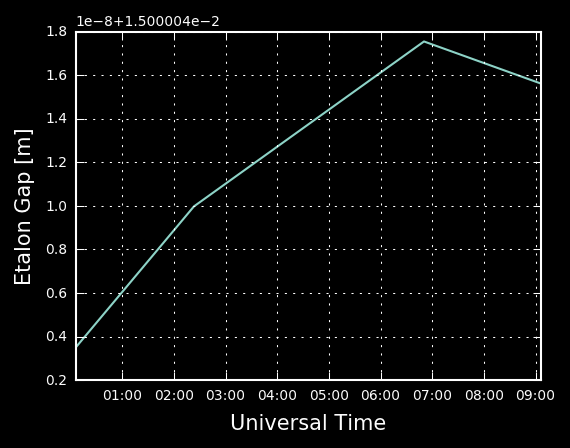

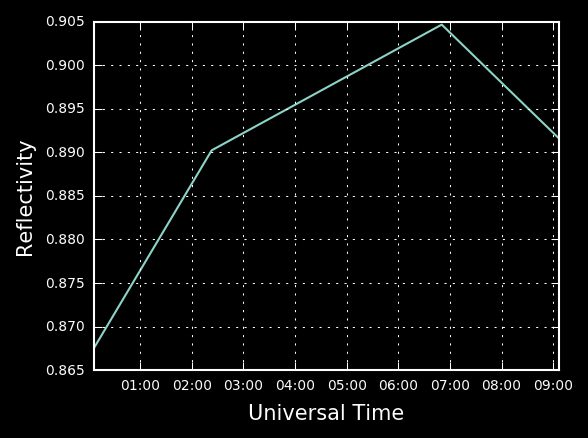

In [47]:
print FPI_Results['laser_value'].keys() # All the laser parameters are contained here

param_name = {'I':'Intensity [arb]',
              't':'Etalon Gap [m]',
              'R':'Reflectivity'}
for param in ['I','t','R']:
    Fig = plt.figure()
    Graph = Fig.add_subplot(111)
    Graph.hold(True)
    Graph.grid(True)
    Graph.plot(FPI_Results['laser_times'], FPI_Results['laser_value'][param])
    Graph.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    Graph.set_xlabel('Universal Time', fontsize = 10)
    Graph.set_ylabel(param_name[param], fontsize = 10)

## This is some example code for how to look at the laser fits

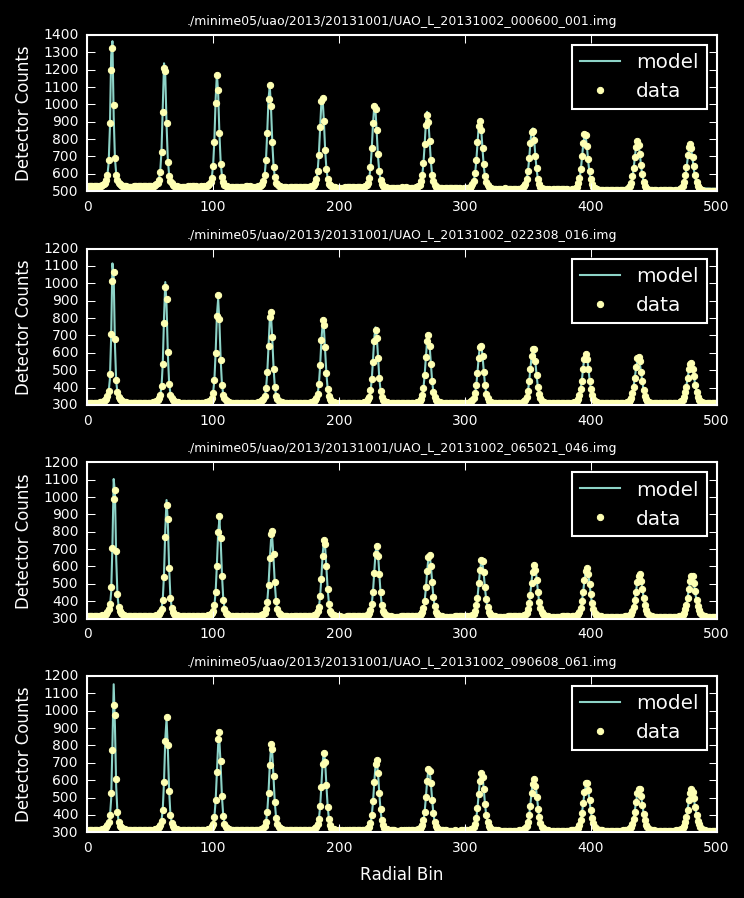

In [49]:
import FPI
from lmfit import Minimizer, Parameters, report_errors, minimize

N = len(FPI_Results['laser_fringes'])

fig = plt.figure(figsize=(5,1.5*N))

for i in range(N):

    ax = fig.add_subplot(N,1,i+1)
    
    laser_params = Parameters()
    for p in FPI_Results['laser_value'].keys():
        laser_params.add(p, FPI_Results['laser_value'][p][i])

    model = FPI.Laser_FringeModel(laser_params, FPI_Results['laser_annuli'][i])

    ax.plot(model, label='model')
    ax.plot(FPI_Results['laser_fringes'][i],'.', label='data')
    ax.set_ylabel('Detector Counts')
    plt.legend(loc='best')
    
    plt.title(FPI_Results['laser_fns'][i],fontsize=6)
    
ax.set_xlabel('Radial Bin')
plt.tight_layout()

## This is some example code for how to look at the sky fits
#### ( This is somewhat slow )

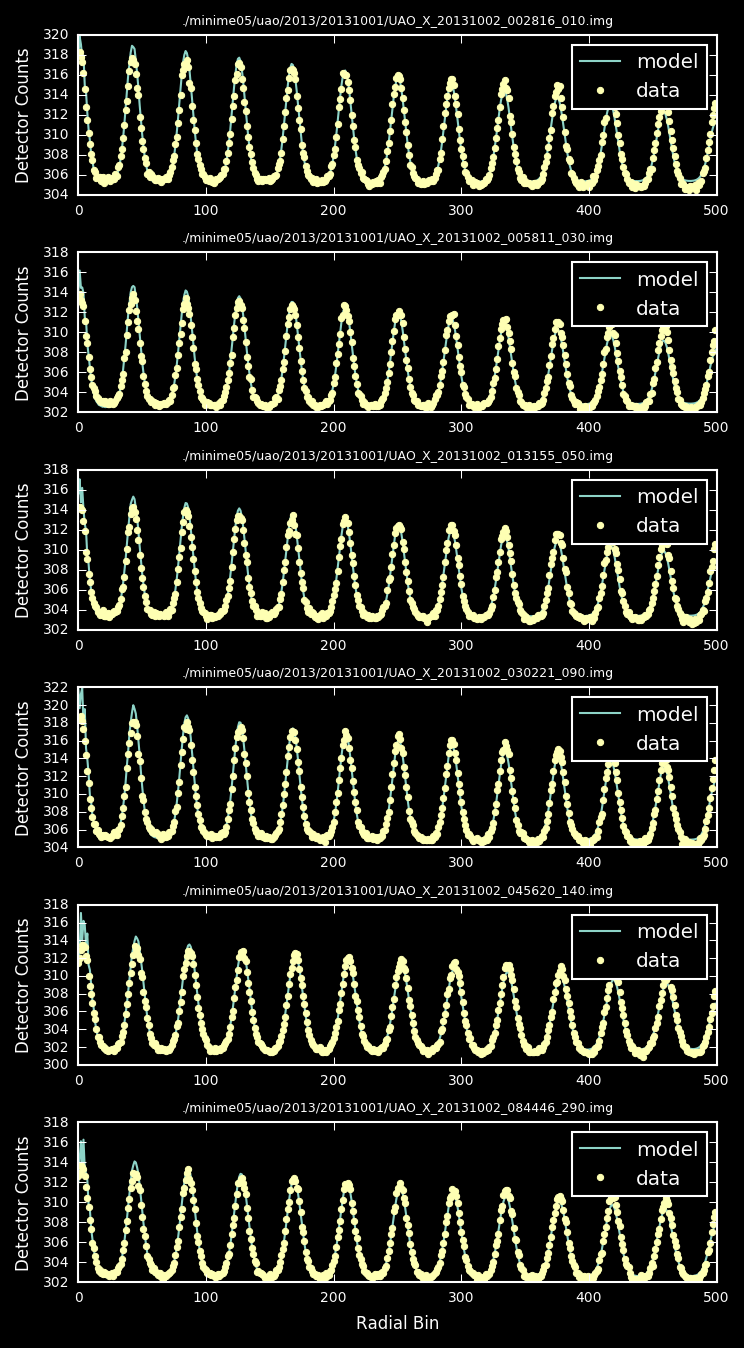

In [56]:
import FPI
from lmfit import Minimizer, Parameters, report_errors, minimize
lam0 = 630.0e-9
L = 100 # Spectral resoluion


N = len(FPI_Results['sky_fringes'])

fig = plt.figure(figsize=(5,1.5*N))

for i in range(N):

    ax = fig.add_subplot(N,1,i+1)
    
    r = FPI_Results['sky_annuli'][i]
    sky_params = Parameters()
    for p in FPI_Results['sky_value'].keys():
        sky_params.add(p, FPI_Results['sky_value'][p][i])
        
    A_1D, lamvec = FPI.get_conv_matrix_1D(sky_params, r, L, lam0)
    model = FPI.Sky_FringeModel(sky_params, r, lamvec, A_1D)

    ax.plot(model, label='model')
    ax.plot(FPI_Results['sky_fringes'][i],'.', label='data')
    ax.set_ylabel('Detector Counts')
    plt.legend(loc='best')
    
    plt.title(FPI_Results['sky_fns'][i],fontsize=6)
    
ax.set_xlabel('Radial Bin')
plt.tight_layout()